## Şablon eşleme

Görüntünün bir alt kümesi

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

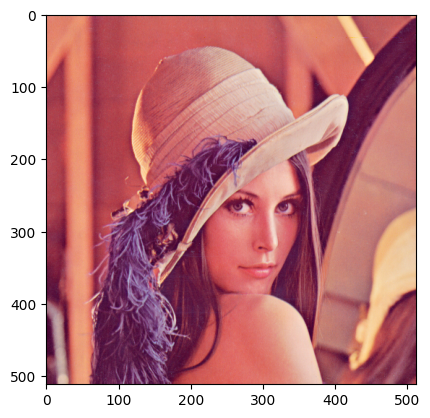

In [2]:
full = cv2.imread('/content/lena_std.tif')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

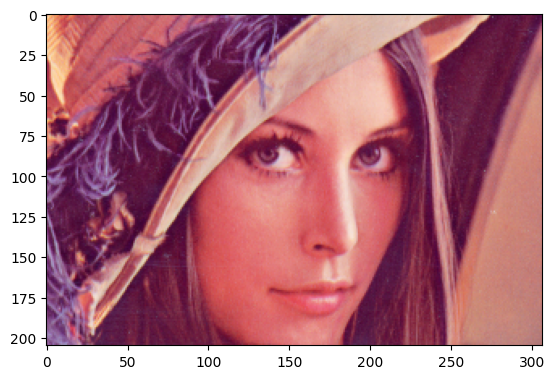

In [3]:
face= cv2.imread('/content/lena_face.tif')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [4]:
name = ['cv2.TM_CCOEFF Correlation coefficient', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR Cross correlation','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

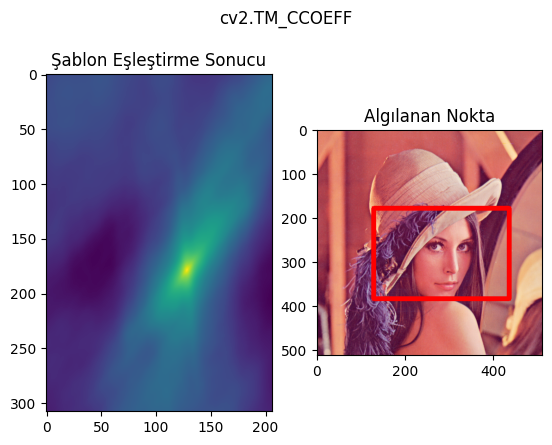

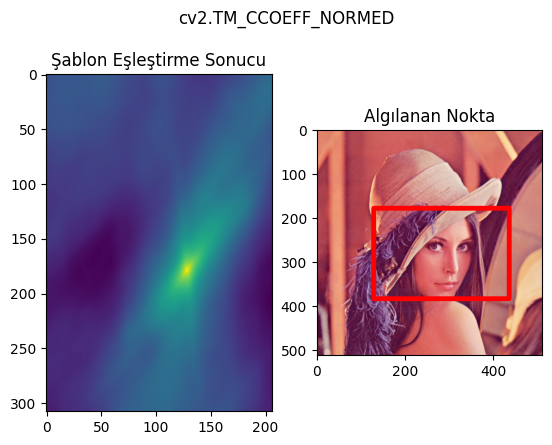

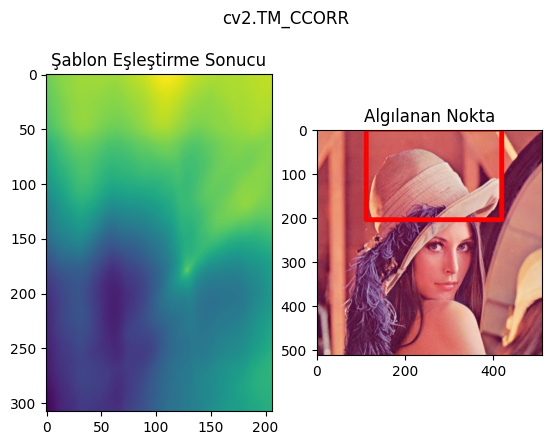

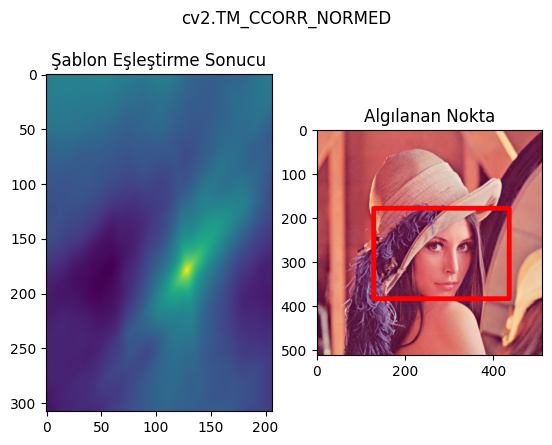

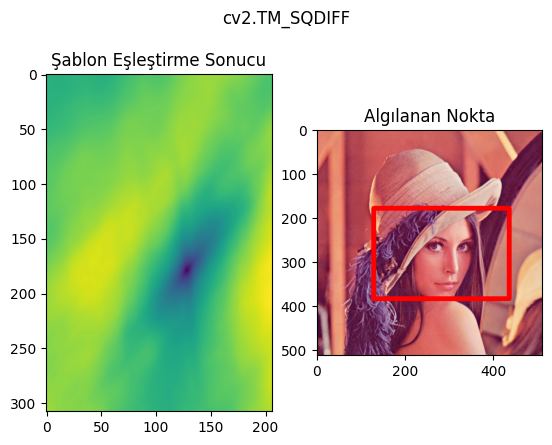

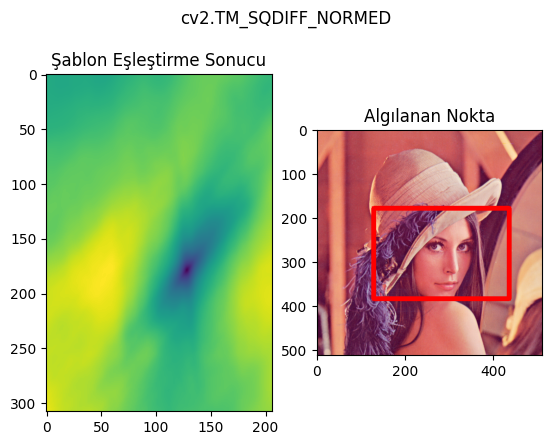

In [5]:
height, width,channels = face.shape
for m in methods:

    # Resmin bir kopyasını oluşturun
    full_copy = full.copy()

    # Dize yerine gerçek işlevi alın
    method = eval(m)

    # Şablonu uygula Yöntemle eşleştirme
    res = cv2.matchTemplate(full_copy,face,method)

    # Maks ve Min değerlerinin yanı sıra konumlarını alın
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Dikdörtgen çizimini ayarlama

    # Yöntem TM_SQDIFF veya TM_SQDIFF_NORMED ise minimum değeri alın
    # Sol taraftaki son 2 resimdeki renklendirmeye dikkat edin.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Dikdörtgenin Sağ Alt Kısmını Ata
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Kırmızı Dikdörtgeni Çiz
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Görüntüleri Çiz
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Şablon Eşleştirme Sonucu')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Algılanan Nokta')
    plt.suptitle(m)


    plt.show()
    print('\n')
    print('\n')